# 시험지가 똑같은 형태일까?

1. 시험 과목이 다를 수 있지 않을까? => 확인 불가
2. 시험지 문항 수가 같을까? => 시험지 문항 수가 다르다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import missingno as msno

In [2]:
%%time
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}   

# 데이터 경로 맞춰주세요!
# 혹시 코랩환경을 사용하신다면 왼쪽 폴더모양 아이콘을 눌러 "train_data.csv"를 드래그&드롭으로 업로드한 후 사용해주세요
DATA_PATH = '../input/data/train_data.csv'
df = pd.read_csv(DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])
df = df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

CPU times: user 4.26 s, sys: 412 ms, total: 4.67 s
Wall time: 4.66 s


In [3]:
df.head(50)

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
5,0,A060001007,A060000001,1,2020-03-24 00:17:47,7225
6,0,A060003001,A060000003,0,2020-03-26 05:52:03,7226
7,0,A060003002,A060000003,1,2020-03-26 05:52:10,7226
8,0,A060003003,A060000003,1,2020-03-26 05:53:14,7226
9,0,A060003004,A060000003,1,2020-03-26 05:53:29,7226


In [4]:
df['totalProblem'] = df['assessmentItemID'].apply(lambda x: int(x[-3:]))

count_problem = df.groupby('testId').agg({'totalProblem': 'max'})
count_problem

,totalProblem
testId,
A010000001,5
A010000002,5
A010000003,5
A010000004,5
A010000005,5
...,...
A090000070,8
A090000071,8
A090000072,6


/tmp/ipykernel_381/444954641.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True)


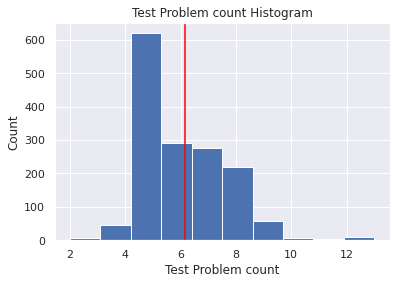

In [5]:
fig, ax = plt.subplots()

count_problem['totalProblem'].hist(ax=ax)

ax.set_title('Test Problem count Histogram')
ax.set_xlabel('Test Problem count')
ax.set_ylabel('Count')
ax.axvline(count_problem['totalProblem'].mean(), color='red')
ax.grid(b=True)

# 문제 푸는 스타일이 비슷할까?

1. 문제 푸는 순서가 영향이 있을 것 같다. (먼저 풀 수록 정답을 맞힐 확률이 높지 않을까?)

In [6]:
def orderSolveProblem(data):
    res = []
    for i in data:
        res.append(i)
    return str(res)

In [7]:
orderSolve = df.groupby(['userID', 'testId']).agg({'totalProblem': orderSolveProblem})
orderSolve

totalProblem
userID testId                           
0      A020000172     [1, 2, 3, 4, 5, 6]
       A020000174        [1, 2, 3, 4, 5]
       A020000181     [1, 2, 3, 4, 5, 6]
       A020000182        [1, 2, 3, 4, 5]
       A020000183  [1, 2, 3, 4, 5, 6, 7]
...                                  ...
7440   A030000136        [1, 2, 3, 4, 5]
       A030000197        [1, 2, 3, 4, 5]
       A050000096        [1, 2, 5, 4, 3]
7441   A030000071        [1, 2, 3, 4, 5]
       A040000165           [1, 2, 3, 4]

[365164 rows x 1 columns]

In [17]:
solve_style = orderSolve['totalProblem'].unique()
solve_style

array(['[1, 2, 3, 4, 5, 6]', '[1, 2, 3, 4, 5]', '[1, 2, 3, 4, 5, 6, 7]',
       ..., '[1, 7, 2, 3, 5, 4, 6]', '[1, 5, 6, 7, 3, 4, 2]',
       '[4, 2, 1, 3, 5, 6, 8, 7]'], dtype=object)

In [9]:
# 누적합
_cumsum = df[['userID', 'testId','answerCode']].groupby(['userID', 'testId']).agg({'answerCode': 'cumsum'})
# 누적갯수
_cumcount = df[['userID', 'testId','answerCode']].groupby(['userID', 'testId']).agg({'answerCode': 'cumcount'}) + 1

cum_ans = _cumsum / _cumcount
cum_ans['userID'] = df['userID']
cum_ans['testId'] = df['testId']
cum_ans

,answerCode,userID,testId
0,1.0,0,A060000001
1,1.0,0,A060000001
2,1.0,0,A060000001
3,1.0,0,A060000001
4,1.0,0,A060000001
...,...,...,...
2266581,0.2,7441,A030000071
2266582,1.0,7441,A040000165
2266583,1.0,7441,A040000165
2266584,1.0,7441,A040000165


In [14]:
def plot_rolled_answerrate(userID, ax):
    
    ax.set_title(f'Students Answer Rate among their Study - User {userID}')
    ax.set_xlabel('# of Questions solved')
    ax.set_ylabel('Answer Rate')
    
    test = df[df.userID == 500]['testId'].unique()[:20]
    
    for t in test:
        cum_ans[(cum_ans.userID == 500) & (cum_ans.testId == t)]['answerCode'].reset_index(drop=True).plot(
        ax=ax,label=f'{t}', linewidth=3)

    ax.legend()

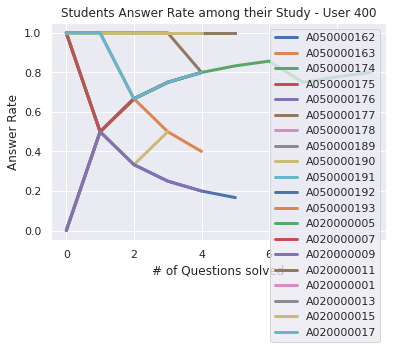

In [15]:
fig, ax = plt.subplots()
plot_rolled_answerrate(400, ax)